In [ ]:
#ROHANKUMAR BAROULIYA  #IPL2023 AUCTION ANALYSIS PROJECT USING PYTHON

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [124]:
ipl = pd.read_csv('C:\\Users\\rohankumar barouliya\\OneDrive\\Desktop\\ipl_2023.csv')
ipl.head()

,PLAYERS,NATIONALITY,TYPE,BASE PRICE,PRICE PAID,PREVIOUS TEAM,TEAMS
0,Ben Stokes,Overseas,All-Rounder,"₹ 2,00,00,000",162500000.0,NaN,Chennai Super Kings
1,Kyle Jamieson,Overseas,Bowler,"₹ 1,00,00,000",10000000.0,Royal Challengers Bangalore,Chennai Super Kings
2,Nishant Sindhu,Indian,All-Rounder,"₹ 20,00,000",6000000.0,NaN,Chennai Super Kings
3,Ajinkya Rahane,Indian,Batter,"₹ 50,00,000",5000000.0,Kolkata Knight Riders,Chennai Super Kings
4,Bhagath Varma,Indian,All-Rounder,"₹ 20,00,000",2000000.0,Chennai Super Kings,Chennai Super Kings


In [125]:
ipl.shape

(568, 7)

In [126]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PLAYERS         568 non-null    object 
 1   NATIONALITY     568 non-null    object 
 2   TYPE            568 non-null    object 
 3    BASE PRICE     568 non-null    object 
 4     PRICE PAID    243 non-null    float64
 5   PREVIOUS TEAM   230 non-null    object 
 6   TEAMS           568 non-null    object 
dtypes: float64(1), object(6)
memory usage: 31.2+ KB


In [127]:
ipl.columns

Index(['PLAYERS', 'NATIONALITY', 'TYPE', ' BASE PRICE ', '  PRICE PAID  ',
       'PREVIOUS TEAM', 'TEAMS'],
      dtype='object')

In [128]:
#drop unwanted or empty column as follow:
#> ipl.drop('Unnamed: 6', axis=1, inplace = True)
#> ipl.drop('Unnamed: 7', axis=1, inplace = True)
#> ipl.head() # to check o/p of drop fnc.

In [129]:
ipl.isnull().sum()  #give total null spaces in each column

PLAYERS             0
NATIONALITY         0
TYPE                0
 BASE PRICE         0
  PRICE PAID      325
PREVIOUS TEAM     338
TEAMS               0
dtype: int64

In [130]:
#to fill null value space with 0.
ipl['  PRICE PAID  '] = ipl['  PRICE PAID  '].fillna(0)

In [131]:
#check players unsold in previous auction
ipl[ipl['PREVIOUS TEAM'].isnull()]

,PLAYERS,NATIONALITY,TYPE,BASE PRICE,PRICE PAID,PREVIOUS TEAM,TEAMS
0,Ben Stokes,Overseas,All-Rounder,"₹ 2,00,00,000",162500000.0,NaN,Chennai Super Kings
2,Nishant Sindhu,Indian,All-Rounder,"₹ 20,00,000",6000000.0,NaN,Chennai Super Kings
5,Ajay Mandal,Indian,All-Rounder,"₹ 20,00,000",2000000.0,NaN,Chennai Super Kings
6,Shaik Rasheed,Indian,Batter,"₹ 20,00,000",2000000.0,NaN,Chennai Super Kings
25,Mukesh Kumar,Indian,Bowler,"₹ 20,00,000",55000000.0,NaN,Delhi Capitals
...,...,...,...,...,...,...,...
563,Dhruv Patel,Indian,All-Rounder,"₹ 20,00,000",0.0,NaN,UNSOLD
564,Jack Prestwidge,Overseas,All-Rounder,"₹ 20,00,000",0.0,NaN,UNSOLD
565,Aditya Sarvate,Indian,All-Rounder,"₹ 20,00,000",0.0,NaN,UNSOLD
566,Sagar Solanki,Indian,All-Rounder,"₹ 20,00,000",0.0,NaN,UNSOLD


In [132]:
#label unsold players as not participated
ipl['PREVIOUS TEAM'] = ipl['PREVIOUS TEAM'].fillna('not participated')

In [133]:
ipl.isnull().sum()

PLAYERS           0
NATIONALITY       0
TYPE              0
 BASE PRICE       0
  PRICE PAID      0
PREVIOUS TEAM     0
TEAMS             0
dtype: int64

In [134]:
#to see sold players in a column named status
teams = ipl[ipl['  PRICE PAID  ']>0]['TEAMS'].unique()
teams

array(['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
       'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
       'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad'], dtype=object)

In [135]:
ipl['status'] = ipl['TEAMS'].replace(teams,'sold')
ipl.head()

,PLAYERS,NATIONALITY,TYPE,BASE PRICE,PRICE PAID,PREVIOUS TEAM,TEAMS,status
0,Ben Stokes,Overseas,All-Rounder,"₹ 2,00,00,000",162500000.0,not participated,Chennai Super Kings,sold
1,Kyle Jamieson,Overseas,Bowler,"₹ 1,00,00,000",10000000.0,Royal Challengers Bangalore,Chennai Super Kings,sold
2,Nishant Sindhu,Indian,All-Rounder,"₹ 20,00,000",6000000.0,not participated,Chennai Super Kings,sold
3,Ajinkya Rahane,Indian,Batter,"₹ 50,00,000",5000000.0,Kolkata Knight Riders,Chennai Super Kings,sold
4,Bhagath Varma,Indian,All-Rounder,"₹ 20,00,000",2000000.0,Chennai Super Kings,Chennai Super Kings,sold


In [136]:
#SEE PLAYERS WITH SAME NAME
ipl[ipl['PLAYERS'].duplicated(keep=False)] #keep=false used as we don't want these players

,PLAYERS,NATIONALITY,TYPE,BASE PRICE,PRICE PAID,PREVIOUS TEAM,TEAMS,status
374,Akash Singh,Indian,Bowler,"₹ 20,00,000",0.0,not participated,UNSOLD,UNSOLD
384,Shivam Sharma,Indian,Bowler,"₹ 20,00,000",0.0,not participated,UNSOLD,UNSOLD
394,Akash Singh,Indian,Batter,"₹ 20,00,000",0.0,not participated,UNSOLD,UNSOLD
425,Prince Yadav,Indian,Bowler,"₹ 20,00,000",0.0,not participated,UNSOLD,UNSOLD
535,Prince Yadav,Indian,All-Rounder,"₹ 20,00,000",0.0,not participated,UNSOLD,UNSOLD
542,Shivam Sharma,Indian,All-Rounder,"₹ 20,00,000",0.0,not participated,UNSOLD,UNSOLD


In [137]:
#HOW MANY PLAYERS PARTICIPATED IN AUCTION?
ipl.shape[0] #GIVE NO.OF ROWS

568

In [138]:
#TYPES OF PLAYERS PARTICIPATED?
types = ipl['TYPE'].value_counts()
types.reset_index()

,index,TYPE
0,Bowler,199
1,All-Rounder,193
2,Batter,110
3,Wicket-Keeper,66


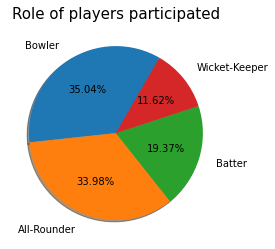

In [139]:
#pie chart for types representation
plt.pie(types.values, labels=types.index, labeldistance=1.2, autopct='%1.2f%%', shadow=True, startangle=60)
plt.title('Role of players participated', fontsize=15)
plt.show()

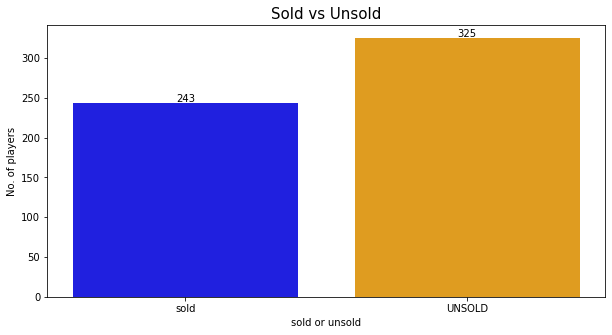

In [140]:
#showing players sold and unsold by BARGRAPH
plt.figure(figsize=(10,5))
fig = sns.countplot(ipl['status'],palette=['Blue','Orange'])
plt.xlabel('sold or unsold')
plt.ylabel('No. of players')
plt.title('Sold vs Unsold', fontsize=15)
plt.plot()

for p in fig.patches: #func. to display each of the data labels
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + 
    p.get_width()/2., p.get_height()), ha = 'center', va = 'center',
    xytext = (0,4), textcoords = 'offset points')

In [141]:
ipl.groupby('status')['PLAYERS'].count() # to group sold & unsold players

status
UNSOLD    325
sold      243
Name: PLAYERS, dtype: int64

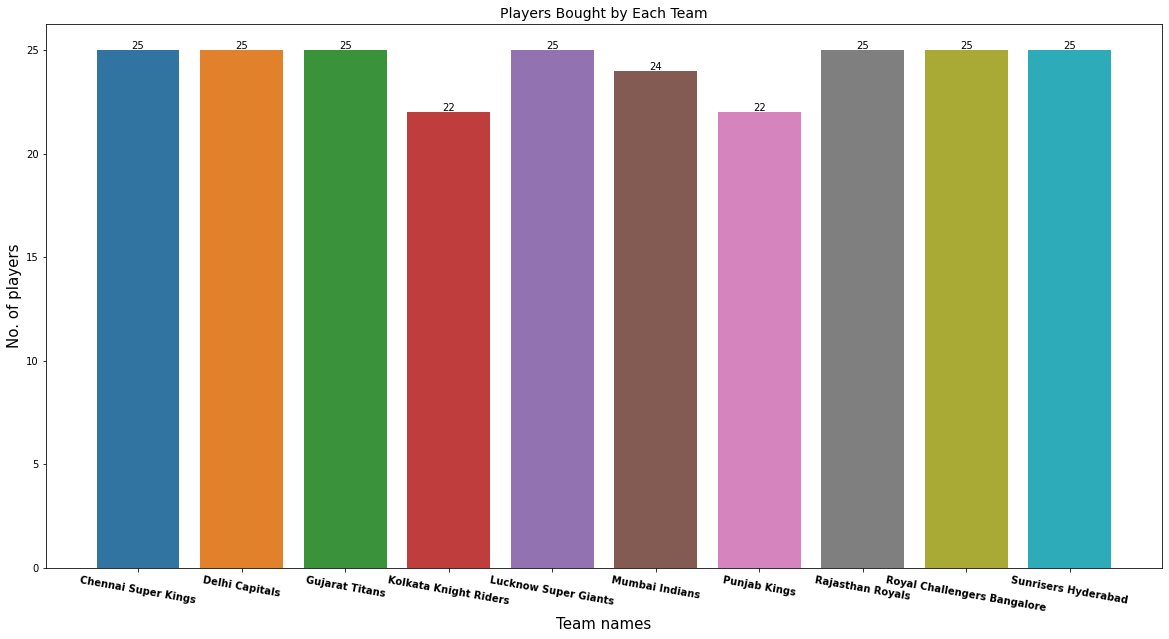

In [142]:
# total no. of players bought by each team
plt.figure(figsize=(20,10))
fig = sns.countplot(ipl[ipl['TEAMS'] != 'UNSOLD']['TEAMS'])  #"!=" represent doesnt equal to
plt.xlabel('Team names', fontsize=15)
plt.ylabel('No. of players', fontsize=15)
plt.title('Players Bought by Each Team', fontsize=14)
plt.xticks(fontweight='bold', rotation=350) #tilting team names in x-axis by 70degrees
plt.plot()

for p in fig.patches: #func. to display each of the data labels
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + 
    p.get_width()/2., p.get_height()), ha = 'center', va = 'center',
    xytext = (0,4), textcoords = 'offset points')

In [143]:
ipl['retention'] = ipl[' BASE PRICE ']

In [189]:
#treating base price
ipl[' BASE PRICE '].replace('RETAINED',0, inplace = True)

In [194]:
ipl['base_price_unit'] = ipl[' BASE PRICE '].apply(lambda x: str(x).split(' ')[0])
ipl['Base_Price'] = ipl[' BASE PRICE '].apply(lambda x: str(x).split(' ')[-1])

In [232]:
ipl[' BASE PRICE '].replace('retained',0,inplace=True)
ipl.head(10)

,PLAYERS,NATIONALITY,TYPE,BASE PRICE,PRICE PAID,Prev_team,TEAMS,status,retention,base_price_unit,Base_Price
0,Ben Stokes,Overseas,All-Rounder,"₹ 2,00,00,000",162500000.0,not participated,Chennai Super Kings,sold,"₹ 2,00,00,000",₹,"2,00,00,000"
1,Kyle Jamieson,Overseas,Bowler,"₹ 1,00,00,000",10000000.0,Royal Challengers Bangalore,Chennai Super Kings,sold,"₹ 1,00,00,000",₹,"1,00,00,000"
2,Nishant Sindhu,Indian,All-Rounder,"₹ 20,00,000",6000000.0,not participated,Chennai Super Kings,sold,"₹ 20,00,000",₹,"20,00,000"
3,Ajinkya Rahane,Indian,Batter,"₹ 50,00,000",5000000.0,Kolkata Knight Riders,Chennai Super Kings,sold,"₹ 50,00,000",₹,"50,00,000"
4,Bhagath Varma,Indian,All-Rounder,"₹ 20,00,000",2000000.0,Chennai Super Kings,Chennai Super Kings,sold,"₹ 20,00,000",₹,"20,00,000"
5,Ajay Mandal,Indian,All-Rounder,"₹ 20,00,000",2000000.0,not participated,Chennai Super Kings,sold,"₹ 20,00,000",₹,"20,00,000"
6,Shaik Rasheed,Indian,Batter,"₹ 20,00,000",2000000.0,not participated,Chennai Super Kings,sold,"₹ 20,00,000",₹,"20,00,000"
7,A. Rayudu,Indian,Batter,0,67500000.0,Chennai Super Kings,Chennai Super Kings,sold,RETAINED,0,0
8,Deepak Chahar,Indian,Bowler,0,140000000.0,Chennai Super Kings,Chennai Super Kings,sold,RETAINED,0,0
9,Devon Conway,Overseas,Batter,0,10000000.0,Chennai Super Kings,Chennai Super Kings,sold,RETAINED,0,0


In [197]:
#total players retained & bought
ipl.groupby(['TEAMS','retention'])['retention'].count()[:-1]

TEAMS                        retention    
Chennai Super Kings          RETAINED          18
                             ₹ 1,00,00,000      1
                             ₹ 2,00,00,000      1
                             ₹ 20,00,000        4
                             ₹ 50,00,000        1
Delhi Capitals               RETAINED          20
                             ₹ 1,00,00,000      1
                             ₹ 2,00,00,000      2
                             ₹ 20,00,000        1
                             ₹ 50,00,000        1
Gujarat Titans               RETAINED          18
                             ₹ 2,00,00,000      1
                             ₹ 20,00,000        2
                             ₹ 40,00,000        1
                             ₹ 50,00,000        3
Kolkata Knight Riders        RETAINED          14
                             ₹ 1,00,00,000      1
                             ₹ 1,50,00,000      1
                             ₹ 20,00,000        4
       

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Chennai Super Kings'),
  Text(1, 0, 'Delhi Capitals'),
  Text(2, 0, 'Gujarat Titans'),
  Text(3, 0, 'Kolkata Knight Riders'),
  Text(4, 0, 'Lucknow Super Giants'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Punjab Kings'),
  Text(7, 0, 'Rajasthan Royals'),
  Text(8, 0, 'Royal Challengers Bangalore'),
  Text(9, 0, 'Sunrisers Hyderabad')])

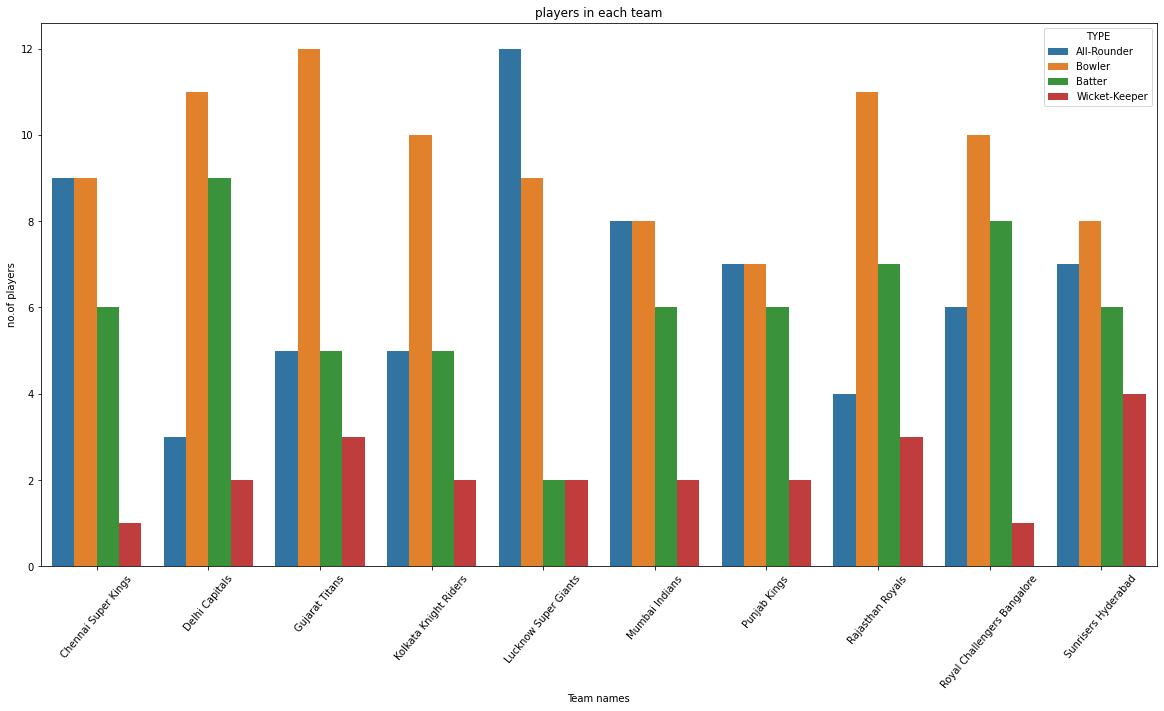

In [198]:
#showing players in each team based on types
plt.figure(figsize=(20,10))
fig = sns.countplot(ipl[ipl['TEAMS'] != 'UNSOLD']['TEAMS'],hue=ipl['TYPE'])
plt.title('players in each team')
plt.xlabel('Team names')
plt.ylabel('no.of players')
plt.xticks(rotation=50) #tilting team names in x-axis by 50degrees

In [217]:
#highest amount spent on single player by each team
ipl[ipl['Base_Price'] != 0].groupby(['TEAMS'])['  PRICE PAID  '].max()[:-1].sort_values(ascending = False)

TEAMS
Punjab Kings                   185000000.0
Mumbai Indians                 175000000.0
Lucknow Super Giants           170000000.0
Chennai Super Kings            162500000.0
Delhi Capitals                 160000000.0
Kolkata Knight Riders          160000000.0
Gujarat Titans                 150000000.0
Royal Challengers Bangalore    150000000.0
Rajasthan Royals               140000000.0
Sunrisers Hyderabad            132500000.0
Name:   PRICE PAID  , dtype: float64

In [184]:
#player retained at max price
ipl[ipl['retention']=='RETAINED'].sort_values(by = '  PRICE PAID  ', ascending = False).head(3)

,PLAYERS,NATIONALITY,TYPE,BASE PRICE,PRICE PAID,Prev_team,TEAMS,status,retention,base_price_unit,Base_Price
112,KL Rahul,Indian,Batter,0,170000000.0,Lucknow Super Giants,Lucknow Super Giants,sold,RETAINED,0,0
83,A. Russell,Overseas,All-Rounder,0,160000000.0,Kolkata Knight Riders,Kolkata Knight Riders,sold,RETAINED,0,0
142,Rohit Sharma,Indian,Batter,0,160000000.0,Mumbai Indians,Mumbai Indians,sold,RETAINED,0,0


In [221]:
#TOP 5 BOWLERS
ipl[(ipl['Base_Price'] != 0) & (ipl['TYPE']=='Bowler')].sort_values(by = '  PRICE PAID  ', ascending = False).head()

,PLAYERS,NATIONALITY,TYPE,BASE PRICE,PRICE PAID,Prev_team,TEAMS,status,retention,base_price_unit,Base_Price
70,Rashid Khan,Overseas,Bowler,0,150000000.0,Gujarat Titans,Gujarat Titans,sold,RETAINED,0,0
8,Deepak Chahar,Indian,Bowler,0,140000000.0,Chennai Super Kings,Chennai Super Kings,sold,RETAINED,0,0
136,J. Bumrah,Indian,Bowler,0,120000000.0,Mumbai Indians,Mumbai Indians,sold,RETAINED,0,0
95,Varun Chakaravarthy,Indian,Bowler,0,120000000.0,Kolkata Knight Riders,Kolkata Knight Riders,sold,RETAINED,0,0
90,Shardul Thakur,Indian,Bowler,0,107500000.0,Kolkata Knight Riders,Kolkata Knight Riders,sold,RETAINED,0,0


In [181]:
ipl = ipl.rename(columns={'PREVIOUS TEAM':'Prev_team'})

In [182]:
#finding players who were part of a team in previous tournament but are unsold this tournament
unsold_players = ipl[(ipl.Prev_team != 'not participated')
                    & (ipl.TEAMS == 'UNSOLD')][['PLAYERS','Prev_team']]   

In [183]:
print(unsold_players)

                     PLAYERS                    Prev_team
244             Chris Jordan          Chennai Super Kings
245               Adam Milne          Chennai Super Kings
247    Rassie Van Der Dussen             Rajasthan Royals
248            Jimmy Neesham             Rajasthan Royals
252              Tymal Mills               Mumbai Indians
254      Sherfane Rutherford  Royal Challengers Bangalore
255           Riley Meredith               Mumbai Indians
256                Jason Roy               Gujarat Titans
257              Sean Abbott          Sunrisers Hyderabad
261           Daryl Mitchell             Rajasthan Royals
262            Mohammad Nabi        Kolkata Knight Riders
266               Andrew Tye         Lucknow Super Giants
283       Dushmanta Chameera         Lucknow Super Giants
285           Sandeep Sharma                 Punjab Kings
289           Shahbaz Nadeem         Lucknow Super Giants
293               Karun Nair             Rajasthan Royals
295          G

In [230]:
stat = ipl['status'].value_counts()
stat.reset_index()

,index,status
0,UNSOLD,325
1,sold,243


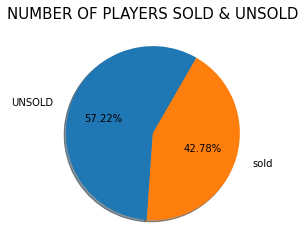

In [231]:
plt.pie(stat.values, labels=stat.index, labeldistance=1.2, autopct='%1.2f%%', shadow=True, startangle=60)
plt.title('PLAYERS SOLD & UNSOLD', fontsize=15)
plt.show()